In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import datetime as dt
import hvplot.pandas
from pathlib import Path
import seaborn as sns

In [55]:
# Read transaction data
transactions = Path("eth_all_transactions_transaction_costs.csv")
transactions_cost= pd.read_csv(transactions,infer_datetime_format=True,parse_dates=True)
transactions_cost["transaction_date"]=pd.to_datetime(transactions_cost["transaction_date"])
transactions_cost["transaction_date"]=transactions_cost["transaction_date"].dt.date
transactions_cost.rename(columns={"sum_daily_transaction_fees":"Sum of Daily Transactions", "total_daily_value":"Daily Sum of ETH"},inplace=True)
transactions_cost.set_index("transaction_date",inplace=True)
transactions_cost.sort_index(ascending=True,inplace=True)
transactions_cost.head(10)

,Daily Sum of ETH,Sum of Daily Transactions
transaction_date,,
2015-08-07,2.008723e+06,37.318414
2015-08-08,1.358322e+07,68.099970
2015-08-09,1.165455e+06,14.098950
2015-08-10,1.670911e+06,31.165144
2015-08-11,1.485732e+06,11.311449
2015-08-12,7.474877e+05,32.586992
2015-08-13,1.787854e+06,24.929169
2015-08-14,2.295449e+06,14.354834
2015-08-15,4.631282e+06,8.836593


# Comparison of ETH Price & Daily Sum of ETH

Text(0, 0.5, 'ETH Price')

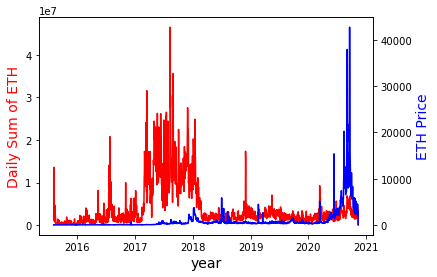

In [56]:
#transactions_cost.hvplot()

fig,ax = plt.subplots()

# make a plot
ax.plot(transactions_cost["Daily Sum of ETH"], color="red")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("Daily Sum of ETH",color="red",fontsize=14)    

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(transactions_cost["Sum of Daily Transactions"],color="blue")
ax2.set_ylabel("ETH Price",color="blue",fontsize=14)



# Top 10 Transaction of ETH in 2020

In [57]:
top_10 = transactions_cost.sort_values(by="Sum of Daily Transactions",ascending=False)
top_10.head(10)

,Daily Sum of ETH,Sum of Daily Transactions
transaction_date,,
2020-09-17,6.229640e+06,42763.252558
2020-09-02,6.602145e+06,37967.158998
2020-09-01,6.877648e+06,35517.224016
2020-09-03,6.446595e+06,30984.757578
2020-09-18,6.803064e+06,24732.127096
2020-09-05,6.386870e+06,21819.805283
2020-08-13,3.980493e+06,20263.769675
2020-08-31,5.536341e+06,18895.060102
2020-09-04,6.494007e+06,18017.476676


In [58]:
# Bar chart of top ten transactions
top_10["Sum of Daily Transactions"][:10].hvplot.bar(
        title="Top Ten Transactions For ETH in 2020", 
        xlabel="Transaction Date",
        ylabel="Transaction Fees",
        figsize=(12,8),
        rot=50)

:Bars   [transaction_date]   (Sum of Daily Transactions)

# ETH Price for Last 5 Years

In [59]:
price = Path("price_vol.csv")
price_data= pd.read_csv(price,index_col="price_date",infer_datetime_format=True).reset_index()
price_data.rename(columns={"eth_price":"ETH Close", "btc_price":"BTC Close", "eth_volume":"ETH Volume"},inplace=True)
price_data.sort_index(ascending=True,inplace=True)
price_data.head()

,price_date,ETH Close,BTC Close,ETH Volume,btc_volume
0,2015-08-07 00:00:00.000,2.831620,135.30,9.062200e+04,0.0
1,2015-08-08 00:00:00.000,1.330750,141.96,3.680700e+05,0.0
2,2015-08-10 00:00:00.000,0.687586,135.30,4.004641e+05,0.0
3,2015-08-11 00:00:00.000,1.067379,117.00,1.518998e+06,0.0
4,2015-08-12 00:00:00.000,1.256613,103.43,2.073893e+06,0.0


In [60]:
def to_date_time(price_data):
    return dt.datetime.fromtimestamp(price_data).strftime("%Y-%m-%d")

price_data["price_date"]=pd.to_datetime(price_data["price_date"])
price_data["price_date"]=price_data["price_date"].dt.date
price_data.set_index("price_date",inplace=True)
price_data.head()

,ETH Close,BTC Close,ETH Volume,btc_volume
price_date,,,,
2015-08-07,2.831620,135.30,9.062200e+04,0.0
2015-08-08,1.330750,141.96,3.680700e+05,0.0
2015-08-10,0.687586,135.30,4.004641e+05,0.0
2015-08-11,1.067379,117.00,1.518998e+06,0.0
2015-08-12,1.256613,103.43,2.073893e+06,0.0


In [61]:
price_btc_eth=price_data
price_btc_eth.drop(columns=["ETH Volume","btc_volume"],inplace=True)
price_btc_eth.head()

,ETH Close,BTC Close
price_date,,
2015-08-07,2.831620,135.30
2015-08-08,1.330750,141.96
2015-08-10,0.687586,135.30
2015-08-11,1.067379,117.00
2015-08-12,1.256613,103.43


# Comparison between ETH Price & BTC Price for Last 5 Years

In [62]:
price_btc_eth.hvplot.line(
     xlabel="Date",
     ylabel="ETH & BTC Price",
     title="ETH Price vs. BTC Price for last 5 years", 
     rot=50)

:NdOverlay   [Variable]
   :Curve   [price_date]   (value)

# ETH Price for Last 5 Years

In [63]:
price_data["ETH Close"].hvplot.line(
        x="price_date",
        y="ETH Close",
        xlabel="Date",
        ylabel="ETH Price",
        title="ETH Price for last 5 years", 
        figsize=(15,10),
        rot=50)

:Curve   [price_date]   (ETH Close)

# Comparison of Daily Sum of Transactions & ETH Price

In [64]:
df_price_cost=pd.concat([transactions_cost, price_data],axis="columns", join="inner")
df_price_cost.drop(columns=["BTC Close"],axis=1,inplace=True)
df_price_cost.head()

,Daily Sum of ETH,Sum of Daily Transactions,ETH Close
2015-08-07,2.008723e+06,37.318414,2.831620
2015-08-08,1.358322e+07,68.099970,1.330750
2015-08-10,1.670911e+06,31.165144,0.687586
2015-08-11,1.485732e+06,11.311449,1.067379
2015-08-12,7.474877e+05,32.586992,1.256613


Text(0, 0.5, 'ETH Price')

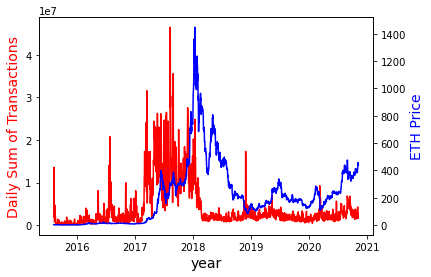

In [65]:
#df_price_cost.hvplot.step(y=["total_daily_value","eth_price"],ylabel="Total Daily Transfers",xlabel="ETH Price",figsize=(15,))
df_price_cost.reset_index(inplace=True)
fig,ax = plt.subplots()

# make a plot
ax.plot(df_price_cost["index"], df_price_cost["Daily Sum of ETH"], color="red")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("Daily Sum of Transactions",color="red",fontsize=14)    

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_price_cost["index"], df_price_cost["ETH Close"],color="blue")
ax2.set_ylabel("ETH Price",color="blue",fontsize=14)



In [66]:
# Gold Price
GOLD_DATA = Path("GoldPricePerOunceHistoricalQuotes.csv")
GOLD = pd.read_csv(GOLD_DATA)
GOLD[" Date"]= pd.to_datetime(GOLD["Date"])
GOLD[" Date"]=GOLD[" Date"].dt.date
GOLD.set_index(" Date", inplace = True)
GOLD = GOLD.rename(columns={' Close/Last': 'Gold Close'})
GOLD.drop(columns=['Date',' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
GOLD.head()

,Gold Close
Date,
2020-11-06,1951.7
2020-11-05,1946.8
2020-11-04,1896.2
2020-11-03,1910.4
2020-11-02,1892.5


In [67]:
#Euro Price
EUR_USD_DATA = Path("EURUSD=X.csv")
EUR_USD = pd.read_csv(EUR_USD_DATA)
EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
EUR_USD["Date"]=EUR_USD["Date"].dt.date
EUR_USD.set_index("Date", inplace = True)
EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})

EUR.head()

,EUR Close
Date,
2015-11-09,1.073341
2015-11-10,1.075951
2015-11-11,1.073756
2015-11-12,1.076299
2015-11-13,1.081502


In [68]:
# Pound Price
GBP_USD_DATA = Path("GBPUSD=X.csv")
GBP_USD = pd.read_csv(GBP_USD_DATA)
GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
GBP_USD["Date"]=GBP_USD["Date"].dt.date
GBP_USD.set_index("Date", inplace = True)
GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
GBP.head()

,GBP Close
Date,
2015-11-09,1.505503
2015-11-10,1.512104
2015-11-11,1.513890
2015-11-12,1.522510
2015-11-13,1.523461


In [69]:
# Yen Price
JPY_USD_DATA = Path("JPYUSD=X.csv")
JPY_USD = pd.read_csv(JPY_USD_DATA)
JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
JPY_USD["Date"]=JPY_USD["Date"].dt.date
JPY_USD.set_index("Date", inplace = True)
JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
JPY.head()

,JPY Close
Date,
2015-11-11,0.008125
2015-11-12,0.008146
2015-11-13,0.008159
2015-11-16,0.008172
2015-11-17,0.008113


In [70]:
# Mining Difficulty 
Mining_Difficulty_DATA = Path("mining_difficulty_sum_daily_2015_to_current.csv")
Mining_Difficulty1 = pd.read_csv(Mining_Difficulty_DATA)
Mining_Difficulty2 = Mining_Difficulty1.rename(columns={'f0_' : 'Date' , 'f1_' : 'Mining Difficulty'})
Mining_Difficulty2["Date"]= pd.to_datetime(Mining_Difficulty2["Date"])
Mining_Difficulty2["Date"]=Mining_Difficulty2["Date"].dt.date
Mining_Difficulty2.sort_values(by=['Date'], inplace=True)
Mining_Difficulty2.set_index("Date", inplace = True)
Mining_Difficulty= Mining_Difficulty2['Mining Difficulty'].astype('float64')
Mining_Difficulty.head()

Date
2015-07-30    8.385496e+14
2015-07-31    4.137990e+15
2015-08-01    4.696236e+15
2015-08-02    5.466519e+15
2015-08-03    5.944421e+15
Name: Mining Difficulty, dtype: float64

In [71]:
Oil_Price_DATA = Path("OilPricePerBarrelHistoricalQuotes.csv")
Oil_USD = pd.read_csv(Oil_Price_DATA, infer_datetime_format=True)
Oil_USD.drop(columns=[' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
Oil_USD = Oil_USD.rename(columns={' Close/Last': 'Close'})
Oil_USD["Date"]= pd.to_datetime(Oil_USD["Date"])
Oil_USD["Date"]=Oil_USD["Date"].dt.date
Oil_USD.set_index("Date", inplace = True)
Oil = Oil_USD.rename(columns={'Close' : 'OIL Close'})
Oil.head()

,OIL Close
Date,
2020-11-06,37.14
2020-11-05,38.79
2020-11-04,39.15
2020-11-03,37.66
2020-11-02,36.81


In [72]:
SP500_DATA = Path("SP500.csv")
SP500 = pd.read_csv(SP500_DATA, infer_datetime_format=True)
SP500["Date"]= pd.to_datetime(SP500["Date"])
SP500["Date"]=SP500["Date"].dt.date
SP500.set_index("Date", inplace = True)
SP500_Close = SP500.rename(columns={'Close' : 'SP500 Close'})
SP500_Close.head()

,SP500 Close
Date,
2015-08-03,2098.04
2015-08-04,2093.32
2015-08-05,2099.84
2015-08-06,2083.56
2015-08-07,2077.57


In [73]:
df_currency=pd.concat([JPY, GBP, EUR],axis="columns",join="inner")
df_currency.head()


,JPY Close,GBP Close,EUR Close
Date,,,
2015-11-11,0.008125,1.513890,1.073756
2015-11-12,0.008146,1.522510,1.076299
2015-11-13,0.008159,1.523461,1.081502
2015-11-16,0.008172,1.521792,1.069999
2015-11-17,0.008113,1.520496,1.068799


In [74]:
df_assets=pd.concat([SP500_Close, Oil, GOLD, price_data],axis="columns",join="inner")
df_assets.drop(columns=["BTC Close"],axis=1,inplace=True)
df_assets.head()

,SP500 Close,OIL Close,Gold Close,ETH Close
2015-11-09,2078.58,43.87,1088.1,0.995803
2015-11-10,2081.72,44.21,1088.5,0.934834
2015-11-11,2075.00,42.93,1084.9,0.788761
2015-11-12,2045.97,41.75,1081.0,0.900742
2015-11-13,2023.04,40.74,1080.9,0.904082


# ETH Price vs Other Assets

In [75]:
df_assets.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [76]:
Price_and_Volume = Path("price_vol.csv")
Price = pd.read_csv(Price_and_Volume)
Price["price_date"]= pd.to_datetime(Price["price_date"])
Price["price_date"]=Price["price_date"].dt.date
Price_close = Price.rename(columns={'price_date': 'Date',
                                   'eth_price' : 'ETH Close',
                                   'btc_price' : 'BTC Close'})
Price_close.set_index("Date", inplace = True)
Price_close.head()

,ETH Close,BTC Close,eth_volume,btc_volume
Date,,,,
2015-08-07,2.831620,135.30,9.062200e+04,0.0
2015-08-08,1.330750,141.96,3.680700e+05,0.0
2015-08-10,0.687586,135.30,4.004641e+05,0.0
2015-08-11,1.067379,117.00,1.518998e+06,0.0
2015-08-12,1.256613,103.43,2.073893e+06,0.0


In [77]:
ETH_price = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
ETH_price.sort_values(by=['Date'], inplace=True)
ETH_price['ETH Close'].astype('float64')
ETH_price.head()

,ETH Close
Date,
2015-08-07,2.831620
2015-08-08,1.330750
2015-08-10,0.687586
2015-08-11,1.067379
2015-08-12,1.256613


In [78]:
BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
BTC_Close.sort_values(by=['Date'], inplace=True)
BTC_Close.head()

,BTC Close
Date,
2015-08-07,135.30
2015-08-08,141.96
2015-08-10,135.30
2015-08-11,117.00
2015-08-12,103.43


Text(0, 0.5, 'ETH Price')

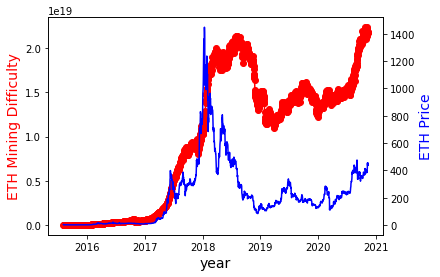

In [79]:
ETH_MiningDifficulty = pd.concat([Mining_Difficulty,ETH_price], axis='columns', join = 'inner')
ETH_MiningDifficulty.head()

ETH_MiningDifficulty.reset_index(inplace=True)
fig,ax= plt.subplots()
ax.plot(ETH_MiningDifficulty["Date"], ETH_MiningDifficulty["Mining Difficulty"], color="red", marker="o")
ax.set_xlabel('year' , fontsize=14)
ax.set_ylabel('ETH Mining Difficulty',color='red',fontsize=14)
ax2=ax.twinx()
ax2.plot(ETH_MiningDifficulty['Date'], ETH_MiningDifficulty['ETH Close'],color='blue')
ax2.set_ylabel('ETH Price',color='blue',fontsize=14)

In [80]:
ETH_MiningDifficulty.set_index('Date', inplace=True)
ETH_MiningDifficulty.head()



,Mining Difficulty,ETH Close
Date,,
2015-08-07,7.632182e+15,2.831620
2015-08-08,8.336665e+15,1.330750
2015-08-10,9.657091e+15,0.687586
2015-08-11,1.075214e+16,1.067379
2015-08-12,1.130908e+16,1.256613


In [81]:
ETH_Mining_Difficulty_Pct = ETH_MiningDifficulty.pct_change()
ETH_Mining_Difficulty_Pct.head()

,Mining Difficulty,ETH Close
Date,,
2015-08-07,NaN,NaN
2015-08-08,0.092304,-0.530039
2015-08-10,0.158388,-0.483310
2015-08-11,0.113394,0.552358
2015-08-12,0.051797,0.177289


<AxesSubplot:xlabel='Date'>

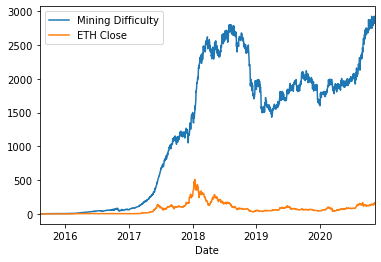

In [82]:
cumulative_returns = (1+ETH_Mining_Difficulty_Pct).cumprod()-1
cumulative_returns.plot()

In [83]:
ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
ETH_Close.sort_values(by=['Date'], inplace=True)
ETH_Close.head()

,ETH Close
Date,
2015-08-07,2.831620
2015-08-08,1.330750
2015-08-10,0.687586
2015-08-11,1.067379
2015-08-12,1.256613


In [84]:
combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
combined_df.head()

,EUR Close,GBP Close,JPY Close,Gold Close,SP500 Close,ETH Close,BTC Close
2015-11-11,1.073756,1.513890,0.008125,1084.9,2075.00,0.788761,101.610
2015-11-12,1.076299,1.522510,0.008146,1081.0,2045.97,0.900742,103.700
2015-11-13,1.081502,1.523461,0.008159,1080.9,2023.04,0.904082,104.860
2015-11-16,1.069999,1.521792,0.008172,1083.6,2053.19,0.933841,106.750
2015-11-17,1.068799,1.520496,0.008113,1068.6,2050.44,0.995273,101.672


In [85]:
pct_change = combined_df.pct_change()
pct_change.head()

,EUR Close,GBP Close,JPY Close,Gold Close,SP500 Close,ETH Close,BTC Close
2015-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-12,0.002368,0.005694,0.002585,-0.003595,-0.013990,0.141971,0.020569
2015-11-13,0.004834,0.000625,0.001596,-0.000093,-0.011207,0.003707,0.011186
2015-11-16,-0.010636,-0.001096,0.001593,0.002498,0.014903,0.032917,0.018024
2015-11-17,-0.001121,-0.000852,-0.007220,-0.013843,-0.001339,0.065785,-0.047569


In [86]:
pct_change_correlation = pct_change.corr()
pct_change_correlation



,EUR Close,GBP Close,JPY Close,Gold Close,SP500 Close,ETH Close,BTC Close
EUR Close,1.000000,0.545577,0.408183,0.077531,0.074823,0.020355,-0.083273
GBP Close,0.545577,1.000000,0.122041,0.008598,0.041444,0.028168,-0.054276
JPY Close,0.408183,0.122041,1.000000,0.138050,0.029184,0.002817,-0.034228
Gold Close,0.077531,0.008598,0.138050,1.000000,0.020451,0.050899,-0.013967
SP500 Close,0.074823,0.041444,0.029184,0.020451,1.000000,-0.039669,-0.077452
ETH Close,0.020355,0.028168,0.002817,0.050899,-0.039669,1.000000,0.037250
BTC Close,-0.083273,-0.054276,-0.034228,-0.013967,-0.077452,0.037250,1.000000


Text(0.5, 1.0, 'Heatmap of Pct Change Correlation')

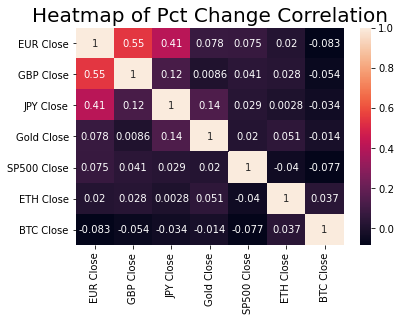

In [87]:
sns.heatmap(pct_change_correlation, annot=True)
plt.title('Heatmap of Pct Change Correlation', fontsize = 20)

In [88]:
price_correlation = combined_df.corr()
price_correlation

,EUR Close,GBP Close,JPY Close,Gold Close,SP500 Close,ETH Close,BTC Close
EUR Close,1.000000,0.306674,0.242195,0.154474,0.319075,0.782048,-0.107570
GBP Close,0.306674,1.000000,-0.314249,-0.347547,-0.396028,0.098148,-0.333591
JPY Close,0.242195,-0.314249,1.000000,0.557244,0.279518,0.100539,0.309267
Gold Close,0.154474,-0.347547,0.557244,1.000000,0.732514,0.201236,0.804665
SP500 Close,0.319075,-0.396028,0.279518,0.732514,1.000000,0.449656,0.501448
ETH Close,0.782048,0.098148,0.100539,0.201236,0.449656,1.000000,0.014317
BTC Close,-0.107570,-0.333591,0.309267,0.804665,0.501448,0.014317,1.000000


Text(0.5, 1.0, 'Heatmap of Price Correlation')

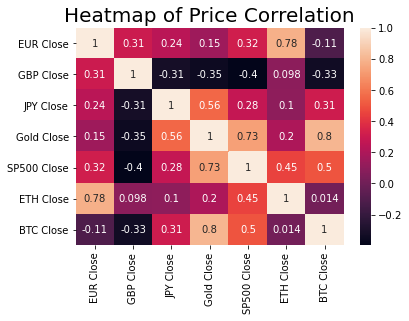

In [89]:
sns.heatmap(price_correlation, annot=True)
plt.title('Heatmap of Price Correlation', fontsize = 20)

<AxesSubplot:title={'center':'Portfolio Risk'}>

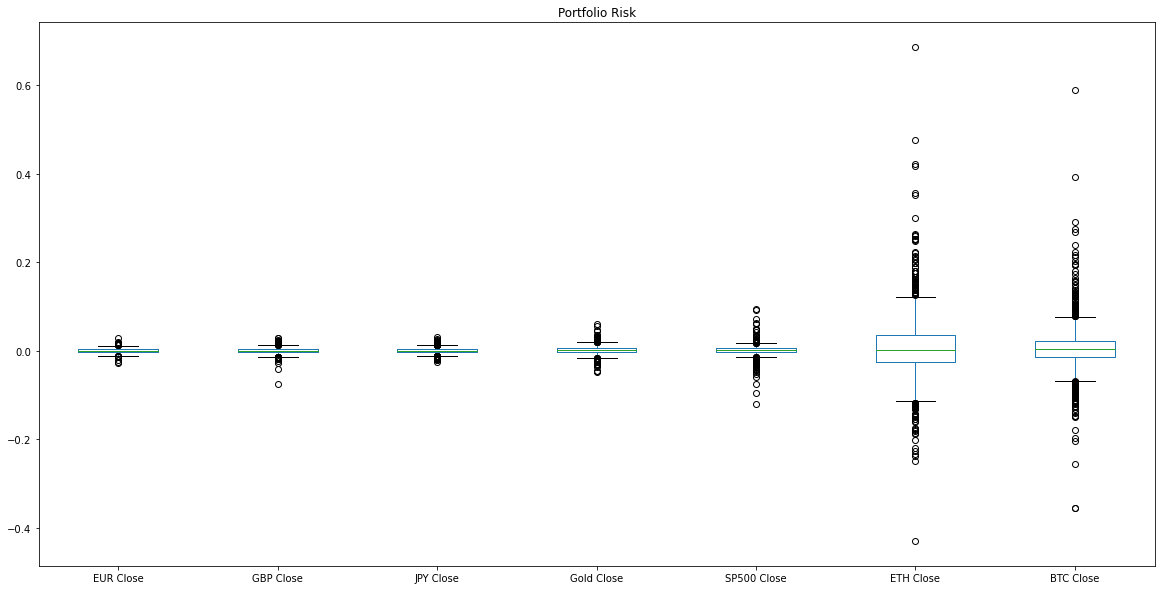

In [90]:
pct_change.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [91]:
pct_change.std()

EUR Close      0.004701
GBP Close      0.006425
JPY Close      0.005478
Gold Close     0.009318
SP500 Close    0.012193
ETH Close      0.073285
BTC Close      0.054479
dtype: float64

In [92]:
ETH_risk = pct_change["ETH Close"].std()
pct_change.std() > ETH_risk

EUR Close      False
GBP Close      False
JPY Close      False
Gold Close     False
SP500 Close    False
ETH Close      False
BTC Close      False
dtype: bool

In [93]:
annual_std = pct_change.std() * np.sqrt(252)
annual_std

EUR Close      0.074632
GBP Close      0.101989
JPY Close      0.086968
Gold Close     0.147922
SP500 Close    0.193550
ETH Close      1.163358
BTC Close      0.864832
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

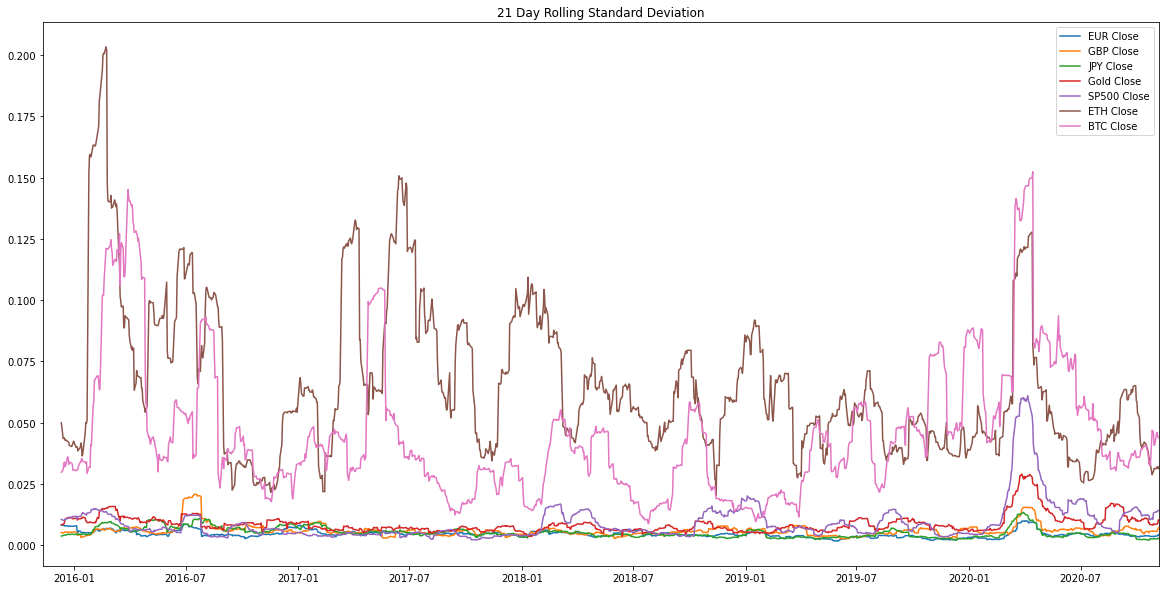

In [94]:
assets_roll_std = pct_change.rolling(window=21).std()
assets_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

<AxesSubplot:title={'center':'Exponentially Weighted Average'}>

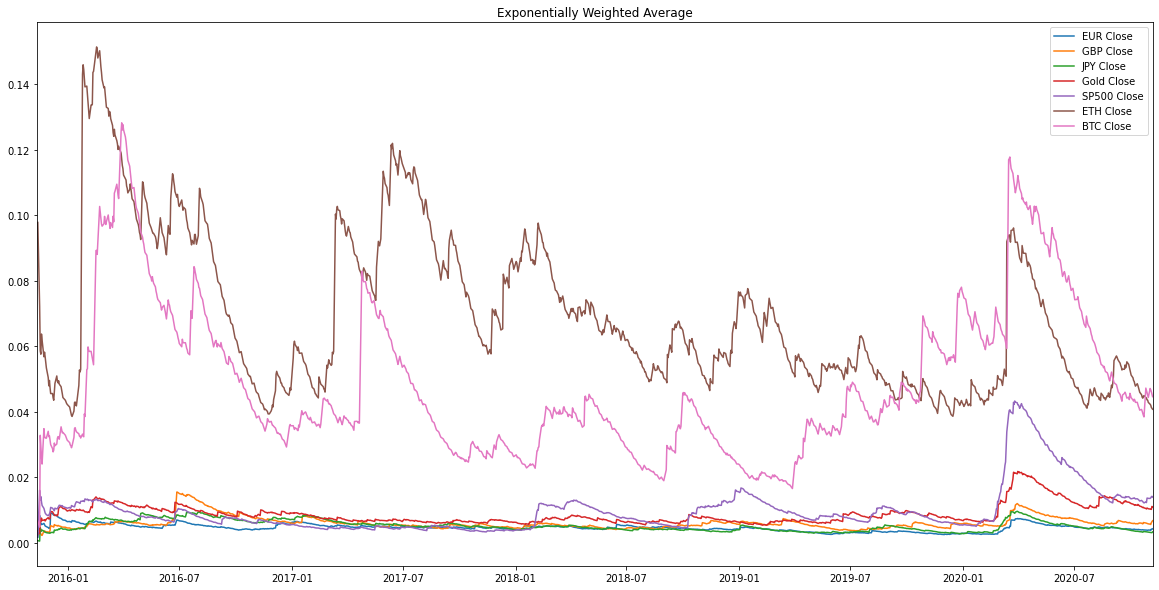

In [95]:
pct_change.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [96]:
sharpe_ratios = (pct_change.mean() * 252) / (pct_change.std() * np.sqrt(252))
sharpe_ratios

EUR Close      0.294927
GBP Close     -0.227381
JPY Close      0.440758
Gold Close     0.870452
SP500 Close    0.642221
ETH Close      1.639683
BTC Close      1.442137
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

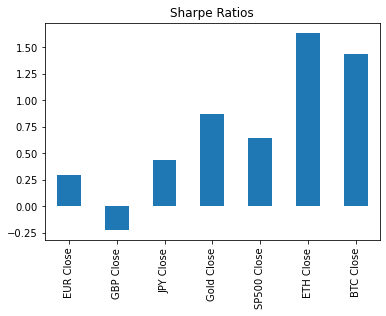

In [97]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [98]:
DD_SP500 = SP500_Close
DD_SP500.head()
DD_SP500['SP500 HighValue'] = DD_SP500['SP500 Close'].cummax()
DD_SP500['SP500 Drawdown'] = DD_SP500['SP500 Close'] / DD_SP500['SP500 HighValue'] -1
greatest_SP500_dd = DD_SP500['SP500 Drawdown'].min()
greatest_SP500_dd

-0.3392495902426059

In [99]:
DD_BTC = BTC_Close
DD_BTC['BTC HighValue'] = DD_BTC['BTC Close'].cummax()
DD_BTC['BTC Drawdown'] = DD_BTC['BTC Close'] / DD_BTC['BTC HighValue'] -1
greatest_BTC_dd = DD_BTC['BTC Drawdown'].min()
greatest_BTC_dd

-0.8473121646192736

In [100]:
DD_EUR = EUR
DD_EUR['EUR HighValue'] = DD_EUR['EUR Close'].cummax()
DD_EUR['EUR Drawdown'] = DD_EUR['EUR Close'] / DD_EUR['EUR HighValue'] -1
greatest_EUR_dd = DD_EUR['EUR Drawdown'].min()
greatest_EUR_dd


-0.14809420615970725

In [101]:
DD_GBP = GBP
DD_GBP['GBP HighValue'] = DD_GBP['GBP Close'].cummax()
DD_GBP['GBP Drawdown'] = DD_GBP['GBP Close'] / DD_GBP['GBP HighValue'] -1
greatest_GBP_dd = DD_GBP['GBP Drawdown'].min()
greatest_GBP_dd

-0.24815184017979908

In [102]:
DD_JPY = JPY
DD_JPY['JPY HighValue'] = DD_JPY['JPY Close'].cummax()
DD_JPY['JPY Drawdown'] = DD_JPY['JPY Close'] / DD_JPY['JPY HighValue'] -1
greatest_JPY_dd = DD_JPY['JPY Drawdown'].min()
greatest_JPY_dd

-0.15506044559896104

In [103]:
DD_ETH = ETH_Close
DD_ETH['ETH HighValue'] = DD_ETH['ETH Close'].cummax()
DD_ETH['ETH Drawdown'] = DD_ETH['ETH Close'] / DD_ETH['ETH HighValue'] -1
greatest_ETH_dd = DD_ETH['ETH Drawdown'].min()
greatest_ETH_dd

-0.9421439618188613

In [104]:
DD_GOLD = GOLD
DD_GOLD['Gold HighValue'] = DD_GOLD['Gold Close'].cummax()
DD_GOLD['Gold Drawdown'] =  DD_GOLD['Gold Close'] / DD_GOLD['Gold HighValue'] -1
greatest_GOLD_dd = DD_GOLD['Gold Drawdown'].min()
greatest_GOLD_dd

-0.49279984536580657

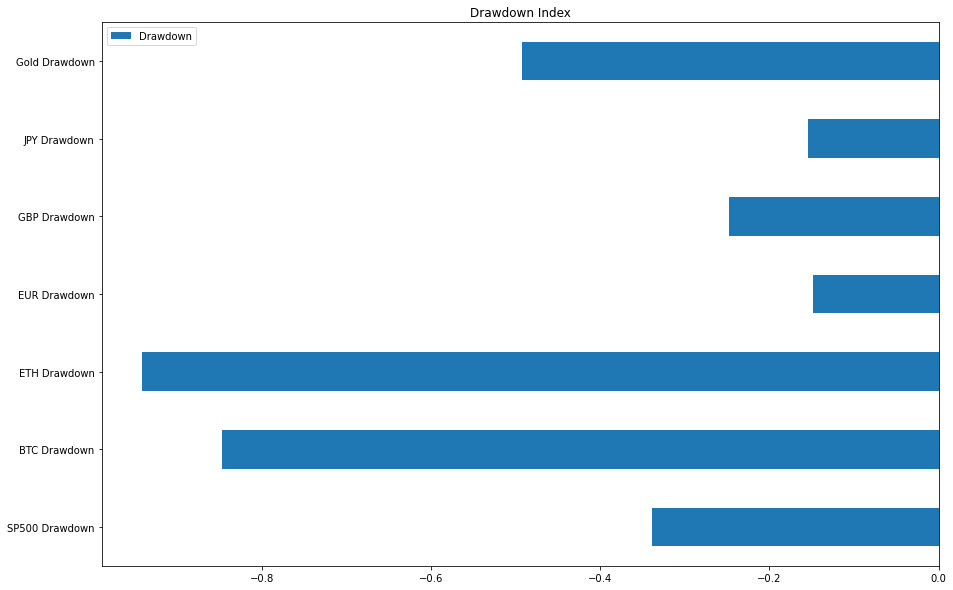

In [105]:
Drawdown = [-0.3392495902426059,-0.8473121646192736,-0.9421439618188613,-0.14809420615970725,-0.24815184017979908,-0.15506044559896104,-0.49279984536580657]
index = ['SP500 Drawdown','BTC Drawdown',
            'ETH Drawdown','EUR Drawdown', 'GBP Drawdown',
            'JPY Drawdown','Gold Drawdown']
DDDD = pd.DataFrame({"Drawdown" : Drawdown}, index = index)
ax3 = DDDD.plot.barh(rot=0,figsize=(15,10),title = "Drawdown Index")